# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
from newsapi import NewsApiClient
import nltk as nltk
from nltk.corpus import reuters, stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xc_ea\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="Bitcoin", language="en")
btc_headlines["articles"][-1]

{'source': {'id': 'business-insider', 'name': 'Business Insider'},
 'author': 'insider@insider.com (Will Paige)',
 'title': "Twitter aims for edge in Big Tech's crypto contest with OpenNode investment",
 'description': "Twitter invested an undisclosed sum in OpenNode's $20 million funding round that valued the Bitcoin payments provider at $220 million.",
 'url': 'https://www.businessinsider.com/twitter-invests-in-opennode-20-million-funding-round-2022-2',
 'urlToImage': 'https://i.insider.com/62067cd1e2fe3c0019ea2971?width=1200&format=jpeg',
 'publishedAt': '2022-02-11T15:12:54Z',
 'content': "The news:\xa0Tech heavyweight\xa0Twitter\xa0invested an undisclosed sum in\xa0OpenNode's $20 million funding round\xa0that valued the Bitcoin payments provider at $220 million, per CoinDesk.\r\nInsider Intelligence\r\n… [+2696 chars]"}

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="Ethereum", language="en")
eth_headlines["articles"][-1]

{'source': {'id': 'business-insider', 'name': 'Business Insider'},
 'author': 'hmalik@insider.com (Hamza Fareed Malik)',
 'title': "Bitcoin donations to Ukraine's army surge as Russian forces roll in, with $3 million coming from just a single giver",
 'description': "A Ukrainian NGO raised over $4 million in bitcoin for the country's army since Russia attacked, with one donor giving $3 million, Elliptic said.",
 'url': 'https://markets.businessinsider.com/news/currencies/bitcoin-donations-to-ukraines-army-rise-as-russian-forces-advance-2022-2',
 'urlToImage': 'https://i.insider.com/6218dfa7d80ca400192d16cf?width=1200&format=jpeg',
 'publishedAt': '2022-02-25T15:21:01Z',
 'content': "A Ukrainian nonprofit has raised bitcoin worth more than $4 million to support the country's army since Russia attacked, according to blockchain analytics company Elliptic.\r\nCome Back Alive a charita… [+2415 chars]"}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(btc_headlines["articles"])

btc_df.tail()

,source,author,title,description,url,urlToImage,publishedAt,content
15,"{'id': 'reuters', 'name': 'Reuters'}",None,Intel launches blockchain chip to tap crypto b...,Intel Corp on Friday launched a new chip for b...,https://www.reuters.com/technology/intel-launc...,https://www.reuters.com/resizer/xofDHdDSZIcvlR...,2022-02-11T18:14:00Z,Feb 11 (Reuters) - Intel Corp on Friday launch...
16,"{'id': 'reuters', 'name': 'Reuters'}",None,"LIVE MARKETS Bitcoin, not exactly a safe haven...",Welcome to the home for real-time coverage of ...,https://www.reuters.com/markets/stocks/live-ma...,https://www.reuters.com/pf/resources/images/re...,2022-02-24T11:13:00Z,Feb 24 - Welcome to the home for real-time cov...
17,"{'id': 'business-insider', 'name': 'Business I...",hrobertson@businessinsider.com (Harry Robertson),Ukraine asking for bitcoin donations is bullis...,"""Still think bitcoin is not useful?"" Fundstrat...",https://markets.businessinsider.com/news/curre...,https://i.insider.com/621e388296929400196c0c32...,2022-03-01T16:03:11Z,The Ukrainian government asking for donations ...
18,"{'id': None, 'name': 'ReadWrite'}",Leslie Wilder,The Beginner’s Guide to Learning to Trade in B...,2021 was a year of significant highs and lows ...,https://readwrite.com/the-beginners-guide-to-l...,https://images.readwrite.com/wp-content/upload...,2022-02-11T22:01:00Z,2021 was a year of significant highs and lows ...
19,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (Will Paige),Twitter aims for edge in Big Tech's crypto con...,Twitter invested an undisclosed sum in OpenNod...,https://www.businessinsider.com/twitter-invest...,https://i.insider.com/62067cd1e2fe3c0019ea2971...,2022-02-11T15:12:54Z,The news: Tech heavyweight Twitter invested an...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(eth_headlines["articles"])

eth_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Shanti Escalante-De Mattei,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,https://www.wired.com/story/web3-governance-to...,https://media.wired.com/photos/621d66c7ea3b8f2...,2022-03-01T14:00:00Z,"In February, shit hit the fan in the usual way..."
1,"{'id': None, 'name': 'Investorplace.com'}",InvestorPlace,"The Market Has Spoken, and It Says Ethereum Is...","Technical analysis isn’t a perfect tool, but i...",https://investorplace.com/2022/02/the-market-h...,https://images.readwrite.com/wp-content/upload...,2022-02-17T17:10:12Z,"Technical analysis isnt a perfect tool, but it..."
2,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (Adam Morgan McCarthy),Colorado will accept crypto for payment of sta...,But the state of Colorado won't hold ethereum ...,https://markets.businessinsider.com/news/curre...,https://i.insider.com/620d0171da5ac00018fe85d9...,2022-02-16T15:36:57Z,People in Colorado will be able to pay their s...
3,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,https://markets.businessinsider.com/news/curre...,https://i.insider.com/62190267d0009b001904bd96...,2022-02-25T17:02:30Z,Coinbase reported that the share of trading vo...
4,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,https://www.theverge.com/2022/2/26/22952357/uk...,https://cdn.vox-cdn.com/thumbor/teEVxppIZ_JTW-...,2022-02-26T20:29:04Z,Illustration by James Bareham / The Verge\r\n\...


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
btc_sent_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sent_df = btc_sent_df[cols]

btc_sent_df.head()
    


,date,text,compound,positive,negative,neutral
0,2022-02-11,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
1,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
2,2022-02-13,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825
3,2022-02-14,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837
4,2022-02-12,The news of one of the biggest money launderin...,0.5859,0.124,0.000,0.876


In [9]:
btc_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.104125,0.079050,0.055100,0.865900
std,0.512526,0.058336,0.072253,0.066511
min,-0.757900,0.000000,0.000000,0.739000
25%,-0.277550,0.045000,0.000000,0.824750
50%,0.128000,0.066000,0.000000,0.853500
75%,0.598650,0.129500,0.099250,0.905500
max,0.778300,0.176000,0.211000,1.000000


In [10]:
# Describe the Ethereum Sentiment

eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
eth_sent_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sent_df = eth_sent_df[cols]

eth_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,2022-02-16,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964
3,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
4,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917


In [11]:
eth_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.138635,0.074300,0.033850,0.891850
std,0.391072,0.080074,0.042274,0.090052
min,-0.526700,0.000000,0.000000,0.692000
25%,-0.110175,0.000000,0.000000,0.841000
50%,0.000000,0.057500,0.000000,0.904500
75%,0.502100,0.130250,0.065000,0.958000
max,0.772200,0.249000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score (0.07905 vs 0.07430)

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score (0.7783 vs 0.7722)

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score (0.249 vs 0.163)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [30]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    #"[^[a-zA-Z0-9]"]
    re_clean = regex.sub('', text)   
    # Create a tokenized list of the words
    re_words = word_tokenize(re_clean)  
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in re_words]   
    # Remove the stop words & convert to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]       
    return tokens

In [51]:
# Create a new tokens column for Bitcoin
word_list = []
for name, values in btc_sent_df['text'].iteritems():
    #print(tokenizer(values))
    word_list.append(tokenizer(values))
    

btc_sent_df['tokens'] = word_list
btc_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-11,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[netflix, making, docuseries, one, worst, rapp..."
1,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853,"[even, cyberspace, department, justice, able, ..."
2,2022-02-13,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825,"[couple, would, never, flee, country, risk, lo..."
3,2022-02-14,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837,"[sundays, super, bowl, ad, indication, crypto,..."
4,2022-02-12,The news of one of the biggest money launderin...,0.5859,0.124,0.000,0.876,"[news, one, biggest, money, laundering, scheme..."


In [34]:
# Create a new tokens column for Ethereum
word_list = []
for name, values in eth_sent_df['text'].iteritems():
    #print(tokenizer(values))
    word_list.append(tokenizer(values))
    

eth_sent_df['tokens'] = word_list
eth_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848,"[february, shit, hit, fan, usual, way, old, tw..."
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[technical, analysis, isnt, perfect, tool, may..."
2,2022-02-16,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964,"[people, colorado, able, pay, state, tax, cryp..."
3,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, e..."
4,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, million,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [39]:
from collections import Counter
from nltk import ngrams
import numpy as np

In [63]:
#Combine BTC token column to one list
btc_list =[]

for name, values in btc_sent_df['tokens'].iteritems():
    btc_list = btc_list + values

print(btc_list)

['netflix', 'making', 'docuseries', 'one', 'worst', 'rapper', 'time', 'coincidentally', 'heather', 'razzlekhan', 'morgan', 'husband', 'ilya', 'lichtenstein', 'charged', 'week', 'conspiring', 'char', 'even', 'cyberspace', 'department', 'justice', 'able', 'use', 'tried', 'true', 'investigative', 'technique', 'following', 'money', 'ms', 'monaco', 'said', 'led', 'u', 'al', 'capone', 'helped', 'u', 'dest', 'char', 'couple', 'would', 'never', 'flee', 'country', 'risk', 'losing', 'access', 'ability', 'child', 'lawyer', 'wroteat', 'hearing', 'prosecutor', 'margaret', 'lynaugh', 'said', 'opposing', 'bail', 'f', 'char', 'sundays', 'super', 'bowl', 'ad', 'indication', 'crypto', 'ha', 'truly', 'arrived', 'mainstream', 'culture', 'didnt', 'catch', 'game', 'watch', 'ad', 'featuring', 'larry', 'david', 'lebron', 'james', 'q', 'char', 'news', 'one', 'biggest', 'money', 'laundering', 'scheme', 'history', 'captivated', 'world', 'tuesday', 'much', 'crimewhich', 'involved', 'billion', 'bitcoin', 'yeah', '

In [69]:
# Generate the Bitcoin N-grams where N=2
btc_counts = Counter(ngrams(btc_list, n=2))

In [64]:
#Get combined list of ethereum tokens
eth_list =[]

for name, values in eth_sent_df['tokens'].iteritems():
    eth_list = eth_list + values

print(eth_list)

['february', 'shit', 'hit', 'fan', 'usual', 'way', 'old', 'tweet', 'resurfaced', 'brantly', 'millegan', 'director', 'operation', 'ethereum', 'name', 'service', 'ens', 'web', 'business', 'written', 'following', 'may', 'char', 'technical', 'analysis', 'isnt', 'perfect', 'tool', 'may', 'point', 'way', 'ethereumethereumethusd', 'continues', 'volatile', 'crypto', 'investment', 'crypto', 'volatile', 'nature', 'im', 'setting', 'apart', 'char', 'people', 'colorado', 'able', 'pay', 'state', 'tax', 'cryptocurrency', 'middle', 'year', 'us', 'state', 'governor', 'ha', 'revealedgov', 'jared', 'polis', 'laid', 'timing', 'move', 'longt', 'char', 'coinbase', 'reported', 'share', 'trading', 'volume', 'ethereum', 'altcoins', 'increased', 'last', 'year', 'bitcoins', 'share', 'dropped', 'dramaticallybetween', 'ethereum', 'trading', 'volume', 'char', 'illustration', 'james', 'bareham', 'verge', 'million', 'ha', 'donated', 'far', 'million', 'cryptocurrency', 'ha', 'donated', 'ukrainian', 'group', 'since', '

In [70]:
# Generate the Ethereum N-grams where N=2
eth_counts = Counter(ngrams(eth_list, n=2))

In [73]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [74]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_counts)

[(('char', 'feb'), 4),
 (('feb', 'reuters'), 4),
 (('reuters', 'bitcoin'), 2),
 (('march', 'reuters'), 2),
 (('netflix', 'making'), 1),
 (('making', 'docuseries'), 1),
 (('docuseries', 'one'), 1),
 (('one', 'worst'), 1),
 (('worst', 'rapper'), 1),
 (('rapper', 'time'), 1)]

In [75]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_counts)

[(('trading', 'volume'), 2),
 (('ha', 'donated'), 2),
 (('since', 'russia'), 2),
 (('russia', 'attacked'), 2),
 (('char', 'cryptocurrency'), 2),
 (('cryptocurrency', 'boom'), 2),
 (('boom', 'past'), 2),
 (('past', 'year'), 2),
 (('year', 'ha'), 2),
 (('ha', 'helped'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [77]:
# Combine bitcoin word list to a large string
btc_string = ' '.join(btc_list)

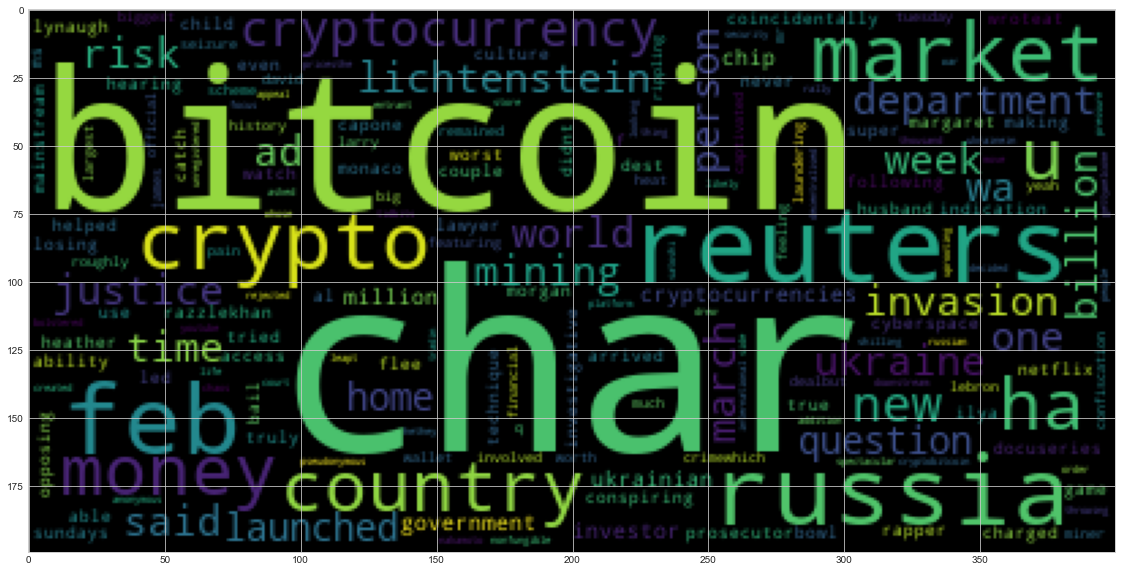

In [81]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(btc_string)
plt.imshow(wc)

In [82]:
# Combine ethereum word list to a large string
eth_string = ' '.join(eth_list)

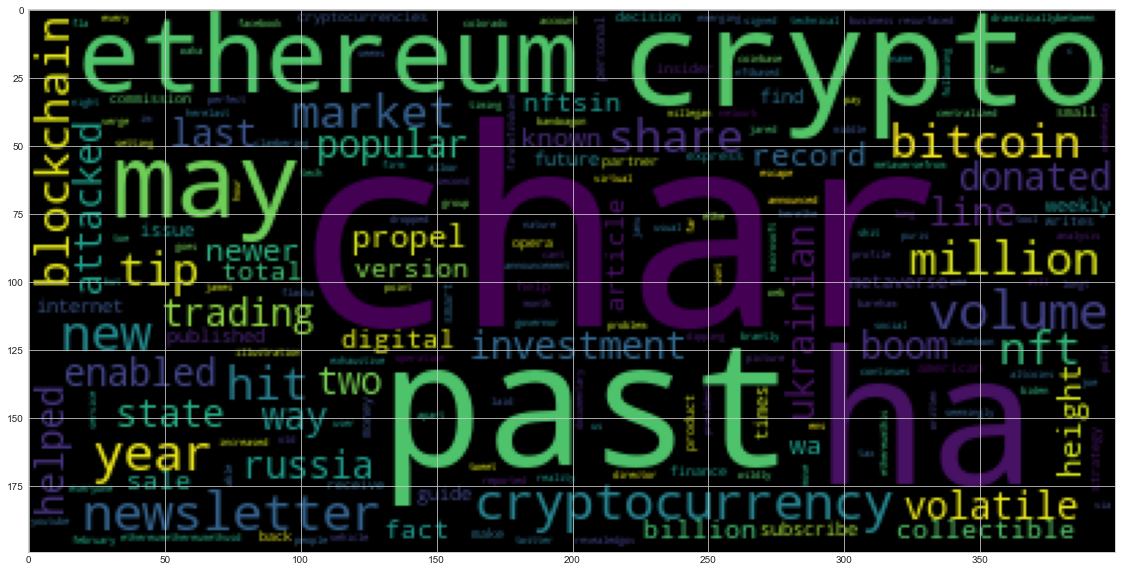

In [83]:
# Generate the Ethereum word cloud
wc = WordCloud(collocations=False).generate(eth_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [84]:
import spacy
from spacy import displacy

In [85]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [86]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [98]:
# Concatenate all of the Bitcoin text together
btc_ner_str = ""
for name, values in btc_sent_df['text'].iteritems():
    btc_ner_str = btc_ner_str + values

print(btc_ner_str)

Netflix
 is making a docuseries about one of the worst rappers of all time
. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars]Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]The couple would never flee from the country at the risk of losing access to their ability to have children, the lawyer wrote.
At the hearing, a prosecutor, Margaret Lynaugh, said in opposing bail f… [+1600 chars]If Sundays Super Bowl ads are any indication, crypto has truly arrived in mainstream culture. And if you didnt catch the game, you can watch the ads here, featuring Larry David, LeBron James, and a Q… [+3454 chars]The news of one of the biggest money laundering schemes in history captivated the world on Tuesday, not so much because of the crimewhich involved 

In [94]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_ner_str)

# Add a title to the document
# YOUR CODE HERE!

In [95]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [97]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_]
btc_entities

['Netflix',
 'about one',
 'Ilya Lichtenstein',
 'this week',
 'the Department of Justice',
 'Monaco',
 'Al Capone',
 'Margaret Lynaugh',
 'Super Bowl',
 'Larry David',
 'LeBron James',
 '+3454',
 'one',
 'Tuesday',
 '$4.5 billion',
 'Lichtensteins',
 'Feb. 1',
 'roughly $3.6 billion',
 '22',
 'Reuters',
 '2021',
 'thousands',
 'Reuters',
 'Russia',
 'Ukraine',
 'Satoshi Nakamoto',
 '2008',
 'Nonfungible Tidbits',
 'this week',
 'Russia',
 'Ukraine',
 'Ukrainians',
 'Russian',
 'YouTube',
 'Alex Castro',
 'Verge',
 'BitConnect',
 'Getty',
 'Russia',
 'last Thursday',
 'Ukranian',
 'Mexico City',
 'Telegr',
 '15',
 'Reuters',
 'Europe',
 'two',
 'Russia',
 'March 4',
 'Reuters',
 'Russia',
 'Ukraine',
 'Russia',
 'chars]NEW YORK',
 'Feb 11',
 'Reuters',
 'Federal Reserve',
 '11',
 'Reuters',
 'Intel Corp',
 'Friday',
 'Reuters',
 'BITCOIN',
 'Ukrainian',
 'Tom Lee',
 'Ukraine',
 'a year',
 '$20 million',
 '$220 million',
 'CoinDesk',
 'Intelligence']

---

### Ethereum NER

In [99]:
# Concatenate all of the Ethereum text together
eth_ner_str = ""
for name, values in eth_sent_df['text'].iteritems():
    eth_ner_str = eth_ner_str + values

print(eth_ner_str)

In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]Technical analysis isnt a perfect tool, but it may point the way for Ethereum
Ethereum (ETH-USD
) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars]People in Colorado will be able to pay their state taxes in cryptocurrency by the middle of this year, the US state's governor has revealed.
Gov. Jared Polis laid out the timing of the move, a longt… [+2206 chars]Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin's share dropped dramatically. 
Between 2020 and 2021, ethereum trading volume in… [+1187 chars]Illustration by James Bareham / The Verge

 


 More than $15 million has been donated so far More than $15 million in cryptocurrency has been donat

In [100]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_ner_str)

# Add a title to the document
# YOUR CODE HERE!

In [102]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [103]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_]
eth_entities

['February',
 'Ethereum Name Service',
 'ENS',
 'May 201',
 'Ethereum',
 'ETH-USD',
 'Crypto',
 'Colorado',
 'the middle of this year',
 'US',
 'Jared Polis',
 'last year',
 'Between 2020 and 2021',
 'James Bareham',
 'More than $15 million',
 'More than $15 million',
 'Ukrainian',
 'Russia',
 '2022',
 'Facebook',
 'Microsoft',
 'Twitter',
 'Ethereum',
 'second',
 'two months',
 'NFT',
 'two hours',
 'YouTube',
 'Waka Flacka Fla',
 'the past few years',
 'NFT',
 '$23 billion',
 'TIME',
 'weekly',
 'TIME',
 'weekly',
 'Biden',
 'Wednesday',
 'first',
 'Brett Harrison',
 'Bitcoin',
 'the past few years',
 'NFT',
 '$23 billion',
 'Ethereum',
 'American Express',
 'Russia',
 'Ukraine',
 'Opera',
 'Keshas',
 'Opera',
 'Monday',
 'Finance Insider',
 'American Express',
 'Ukrainian',
 'more than $4 million',
 'Russia',
 'Elliptic']

---